In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.columns = ['labels', 'data']

In [7]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1}) 
y = df['b_labels'].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33)

In [10]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [11]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 7196


In [12]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (3733, 189)


In [13]:
T = data_train.shape[1]

In [14]:
print(T)

189


In [15]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [17]:
D = 20
M = 15
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 15s 105ms/step - loss: 0.4769 - accuracy: 0.8500 - val_loss: 0.2835 - val_accuracy: 0.8760
Epoch 2/5
117/117 [==============================] - 16s 138ms/step - loss: 0.2286 - accuracy: 0.8915 - val_loss: 0.1761 - val_accuracy: 0.9706
Epoch 3/5
117/117 [==============================] - 13s 108ms/step - loss: 0.1448 - accuracy: 0.9858 - val_loss: 0.1135 - val_accuracy: 0.9859
Epoch 4/5
117/117 [==============================] - 10s 84ms/step - loss: 0.0901 - accuracy: 0.9928 - val_loss: 0.0827 - val_accuracy: 0.9891
Epoch 5/5
117/117 [==============================] - 11s 93ms/step - loss: 0.0629 - accuracy: 0.9962 - val_loss: 0.0680 - val_accuracy: 0.9902


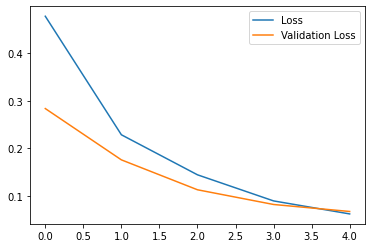

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

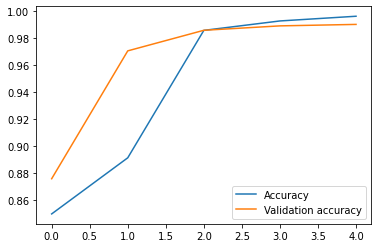

In [21]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()